# Exploring Patterns of Interstate Conflict: An Analysis of the MID 5.0 Dataset (1816–2014)

In [36]:
import pandas as pd
mida = pd.read_csv("/Users/brynnkirkham/DSCI 311/Project 1/MID-data/MIDA 5.0.csv")
country = pd.read_csv("/Users/brynnkirkham/DSCI 311/Project 1/MID-data/MIDB 5.0.csv")
#mida.head()
#country.head()
merged = pd.merge(country, mida, on="dispnum", suffixes=("_country", "_dispute"))
merged.head()

,dispnum,stabb,ccode,stday_country,stmon_country,styear_country,endday_country,endmon_country,endyear_country,sidea,...,fatalpre_dispute,maxdur,mindur,hiact_dispute,hostlev_dispute,recip,numa,numb,ongo2014,version_dispute
0,2,UKG,200,-9,7,1902,24,1,1903,0,...,0,208,178,7,3,0,1,1,0,5
1,2,USA,2,-9,7,1902,24,1,1903,1,...,0,208,178,7,3,0,1,1,0,5
2,3,YUG,345,2,5,1913,25,10,1913,0,...,0,177,177,8,3,0,1,1,0,5
3,3,AUH,300,2,5,1913,25,10,1913,1,...,0,177,177,8,3,0,1,1,0,5
4,4,UKG,200,15,5,1946,13,11,1946,0,...,-9,183,183,16,4,1,1,1,0,5


## Part 1: Introduction

For my Project dataset, I am using the Militarized Interstate Disputes (MID) 5.0 dataset from the Correlates of War (COW) Project, a well-established source used in political science and international relations research. 
This dataset tracks instances of military conflict between countries from 1816 to 2014, which includes information on each disputes duration, the involved participants, level of hostility, outcome, and type of military action. I combined the 2 datasets, disputes (MIDA) and participants (MIDB), to analyze both country involvement and disupte details. 
I am particularly interested in this data because it allows me to examine how patterns of international conflict have changed over time, which countries are instigators or involved, and whether conflicts have become more drawn-out or hostile in recent decades. Using this dataset, I plan to examine the trends and distributions of conflict over time, model the factors that may predict hostile and violent disputes, and test whether global conflict intensity has declined since the 20th century.

## Part 2: Data Cleaning & Structure

For this project, I used the Militarized Interstate Dispute (MID) from the Correlates of War Project (COW). MID includes: 
- MIDA dataset: each individual war and dispute with histility, duration, outcome, etc.
- MIDB dataset: statistics for each state that participated in the dispute or war

I merged these 2 datasets to make it more readable, using the shared key (dispnum) producing 5,883 observations and 38 different variables that combine characterisitcs between countries and disputes. Here I will mainly be cleaning the data and attempting to understand it's overall structure.

In [37]:
# Basic structure of datasets
merged.shape
# (5883, 38)
# Columns
merged.columns
# Info on data types and missing values or obvious issues
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5883 entries, 0 to 5882
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   dispnum           5883 non-null   int64 
 1   stabb             5883 non-null   object
 2   ccode             5883 non-null   int64 
 3   stday_country     5883 non-null   int64 
 4   stmon_country     5883 non-null   int64 
 5   styear_country    5883 non-null   int64 
 6   endday_country    5883 non-null   int64 
 7   endmon_country    5883 non-null   int64 
 8   endyear_country   5883 non-null   int64 
 9   sidea             5883 non-null   int64 
 10  revstate          5883 non-null   int64 
 11  revtype1          5883 non-null   int64 
 12  revtype2          5883 non-null   int64 
 13  fatality_country  5883 non-null   int64 
 14  fatalpre_country  5883 non-null   int64 
 15  hiact_country     5883 non-null   int64 
 16  hostlev_country   5883 non-null   int64 
 17  orig          

- 5,883 rows x 38 columns: each row corresponds to a country + dispute pair (dispute appears once per country participant)

*Important note: missing values are present in MID with (-9 or -99) values to show missing*
- Find the true NaN values versus missing/no data values
- Is there systematic missingess in a certain column or dataset?

In [38]:
# Check missing values
display(merged.isna().sum())
# Count special missing codes
special_missing = (merged == -9).sum().sort_values(ascending=False)
display(special_missing.head(10))

dispnum             0
stabb               0
ccode               0
stday_country       0
stmon_country       0
styear_country      0
endday_country      0
endmon_country      0
endyear_country     0
sidea               0
revstate            0
revtype1            0
revtype2            0
fatality_country    0
fatalpre_country    0
hiact_country       0
hostlev_country     0
orig                0
version_country     0
stday_dispute       0
stmon_dispute       0
styear_dispute      0
endday_dispute      0
endmon_dispute      0
endyear_dispute     0
outcome             0
settle              0
fatality_dispute    0
fatalpre_dispute    0
maxdur              0
mindur              0
hiact_dispute       0
hostlev_dispute     0
recip               0
numa                0
numb                0
ongo2014            0
version_dispute     0
dtype: int64

revtype2            4252
fatalpre_dispute    1828
fatalpre_country    1430
fatality_dispute     703
stday_dispute        608
fatality_country     599
stday_country        596
endday_country       552
endday_dispute       533
settle                43
dtype: int64

### Missing Values
Using the raw MID dataset, the isna().sum() output showed no missing values for every column, the MID data structure does not use NaN missing values, but rather, -9 and/or -99 to indicate missing values. In order to accurately evaluate missing values, I had to check how often each individual variable contains -9. The highest-missing variables are:
- revtype2: 4,252 -> second revision or reason for conflict usually not recorded
- fatalpre_dispute: 1,828 -> precursor deaths not applicable or missing
- fatalpre_country: 1,430 -> country-wide precursor deaths not applicable or missing
- fatality_dispute: 703 -> actual fatalities during the dispute may not have occured (low level conflicts), also uncertain
- fatality_country: 599 -> country-wide actual fatalities during the dispute may not have occured or uncertain
- stday_dispute: 608 -> exact day of dispute start may be unknown for older conflicts, month/year may be known
- stday_country: 552 -> same logic as stday_dispute
- settle: 43 -> the dispute may not have been settled as of 2016, or incomplete records
- outcome: 35 -> the dispute may not have an outcome as of 2016, or incomplete records

In [39]:
# Replace -9 or -99 with NaN for clarity
merged_clean = merged.replace([-9, -99], pd.NA)
merged_clean.isna().sum().sort_values(ascending=False).head(15)

revtype2            4252
fatalpre_dispute    1828
fatalpre_country    1430
fatality_dispute     703
stday_dispute        608
fatality_country     599
stday_country        596
endday_country       552
endday_dispute       533
settle                43
outcome               35
revtype1               6
mindur                 0
hiact_dispute          0
hostlev_dispute        0
dtype: int64

Above, I replaced -9 and -99 values with NaN because they are not valid data and could distort any analysis I do if left unchanged. Converting them allows these missing values to behave adequately in pandas, plot, and/or models such that our EDA reflects the true dataset structure. 

## Part 3: Summary Statistics

This next portion of my project focuses on summary statistics of my dataset. Since MID has many various dispute-level numeric field (duration, hostility, participants, etc.), it is vital to inspect these distributions for patterns and possible outliars. Summary statistics help us determine an idea for the range, central distributions and/or mean, variability, outliars, etc of the most important variables in interstate disputes.

In [40]:
cols = ["fatality_country", "fatality_dispute", "fatalpre_country", "fatalpre_dispute"]
merged_clean[cols] = merged_clean[cols].apply(pd.to_numeric)
# Summary statistics for numeric variables
summary_stats = merged_clean.describe().T
summary_stats

,count,mean,std,min,25%,50%,75%,max
dispnum,5883.0,2680.106238,1456.042815,2.0,1481.0,2884.0,4080.0,4726.0
ccode,5883.0,434.764236,250.335296,2.0,220.0,380.0,664.5,986.0
stmon_country,5883.0,6.250722,3.400082,1.0,3.0,6.0,9.0,12.0
styear_country,5883.0,1959.938807,43.988341,1816.0,1939.5,1971.0,1994.0,2014.0
endmon_country,5883.0,6.639470,3.387486,1.0,4.0,7.0,10.0,12.0
endyear_country,5883.0,1960.372429,43.955715,1816.0,1940.0,1972.0,1995.0,2014.0
sidea,5883.0,0.506204,0.500004,0.0,0.0,1.0,1.0,1.0
revstate,5883.0,0.438722,0.496273,0.0,0.0,0.0,1.0,1.0
fatality_country,5284.0,0.447010,1.294301,0.0,0.0,0.0,0.0,6.0
fatalpre_country,4453.0,0.101505,2.364101,0.0,0.0,0.0,0.0,140.0


### Interpretation:
#### 1. Temporal Variables: Start/End Month and Year
- Variables: `stmon_country`, `styear_country`, `endmon_country`, `endyear_country`
    - Range: start and end years range from 1816 to 2014
    - Mean: 1959-1960
    - Median: 1971-1972 ~ most conflicts occur after WWII
- This contributes to the notion that modern international connections grew rapidly after 1945, likely producing new states and therefore more opportunities for disputes to occur.
#### 2. Actor Attributions
- Variables: `sidea`, `revstate`
    - `sidea` Mean: 0.506 ~ exactly half
    - This variable is binary (0 or 1), so this split is largely expected: for each dispute, one state is Side A, the other is Side B
    - `revstate` Mean: 0.439 ~ about 44% of state participants are "revisionist" AKA wanting to change the status quo
- Disputes may not be about territorial or political change; many are hostile interactions or power displays.
#### 3. Hostility and Highest Action Levels
- **Hostility (1-5 scale):**
    - `hostlev_country` Mean = 3.00
    - `hostlev_dispute` Mean = 3.75
      
Country-level hostilities typically tend to cluster around a level 3 ("a show of force"), while dispute-level hostility is slightly higher since it symbols the most severe action taken (a full out dispute).
- **Highest action level (0-21 scale):**
    - Country mean = 9.94
    - Dispute mean = 13.95

These averages pretty much indicate what was already stated above, most disputes involve moderate militarized actions such as mobilization, threats, or minor skirmishes - not neccessarily large-scale warfare.
#### 4. Duration Variables
- Variables: `maxdur`, `mindur`
    - `maxdur` Mean = 228 days
    - `maxdur` Median = 61 days
    - Max = 4,904 (13.4 years)
    - Standard Deviation = 505 days

Duration is extremely right-skewed. Most disputes tend to last 1-2 months, but rare, prolonged crises stretch the distribution
#### 5. Fatalities and Precursor Fatalities
- `fatality_country` Mean = 0.44
- `fatality_dispute` Mean = 0.76
- Medians = 0
- Maximum values = 6 (which corresponds to “1000+ fatalities” on the MID categorical scale)
- Precursor fatality maximums (48 and 140) represent rare escalation events before the main dispute
- Most rows contain zero fatalities and zero precursor fatalities

At first glance, these fatality data statistics may look low for a dataset that spans both World Wars and other major conflicts. However, this is expected given the structure of the Militarized Interstate Dispute (MID) dataset. MID only captures sub-war militarized interaction such as border skirmishes, threats, mobilizations, or minor clashes below full-scale war. Once a conflict escalates past 1,000 deaths, it is coded as a war. Overall, the summary statistics show that most MID's are short and low fatality interactions where a small minority escalate into more violent incidents. 

## Section 4: Exploratory Visualizations

### Distribution of Key Variables
To gain a deeper understanding of the MID, it is important to explore the distributions of several important variables:
- dispute duration (`maxdur`)
- hostility level (`hostlev_dispute`)
- highest action level (`hiact_dispute`)
- fatality category (`fatality_dispute`)

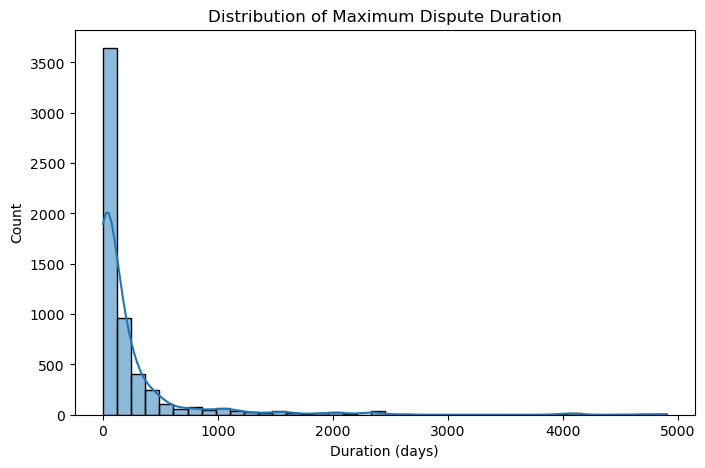

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Duration Distribution

plt.figure(figsize=(8, 5))
sns.histplot(merged_clean["maxdur"], bins=40, kde=True)
plt.title("Distribution of Maximum Dispute Duration")
plt.xlabel("Duration (days)")
plt.ylabel("Count")
plt.show()

#### Interpretation

The distribution of maximum dispute durations is heavily right-skewed. Most militarized disputes last a relatively short period of time - many under 100 days, but a small amount extend for multiple years. This aligns very well with the nature of MID data: the majority of disputes are short incidents, border clashes, threats, or displays of force. Only a small margin of these cases (like long-term standoffs or extended crises) generate the extreme values along the right tail of the distribution. The median duration (61 days) reinforces that shorter disputes are much more common than long ones.

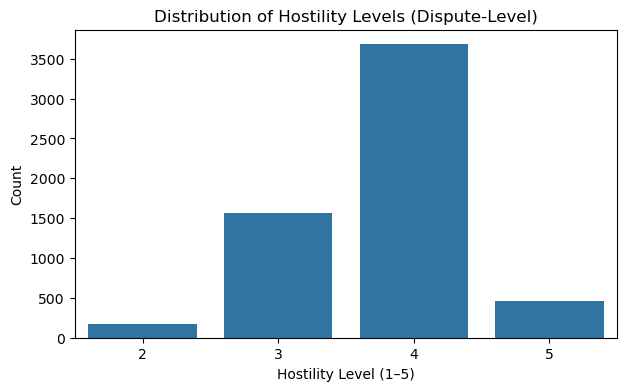

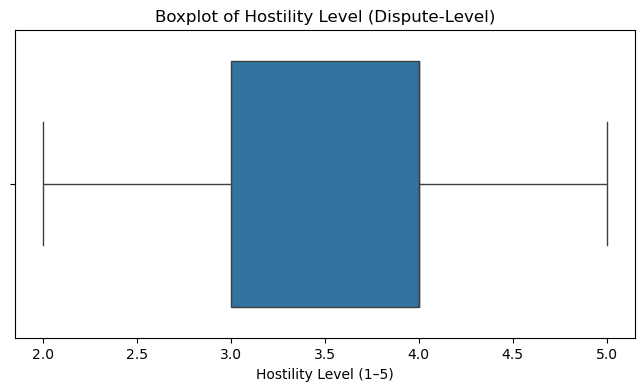

In [42]:
# Hostility Distribution

plt.figure(figsize=(7, 4))
sns.countplot(x="hostlev_dispute", data=merged_clean)
plt.title("Distribution of Hostility Levels (Dispute-Level)")
plt.xlabel("Hostility Level (1–5)")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=merged_clean["hostlev_dispute"])
plt.title("Boxplot of Hostility Level (Dispute-Level)")
plt.xlabel("Hostility Level (1–5)")
plt.show()

#### Interpretation: Distribution of Hostility Levels
Hostility levels in the MID dataset cluster around the middle of the scale, with most disputes coded at levels 3 and 4. These correspond to “Display of Force” and “Use of Force,” which are common forms of militarized interactions short of war. Very few observations fall into the lowest (2) or highest (5) hostility categories. This reflects the MID coding structure: disputes that escalate beyond Level 5 often become interstate wars and are coded in a separate dataset, while very low-level threats are less frequently recorded historically. Overall, the distribution suggests that moderate military actions are the most typical form of interstate conflict.

#### Interpretation: Boxplot of Hostility Levels
The boxplot confirms that hostility levels are centered around Level 3 and 4. The lack of extreme outliers and the narrow interquartile range indicate that most disputes fall into a relatively consistent band of military intensity. This visual reinforces the idea that MID disputes are generally moderate in severity and do not often escalate to the highest hostility categories. The symmetry and tight spread of the box also show that MID hostility levels behave more like an ordinal categorical measure than a continuous, disperse variable.

### Fatality Categories
Because MID fatality codes are categorical (0-6), a countplot is a good way to visualize this data. This helps understand the rarity of higher-fatality disputes.

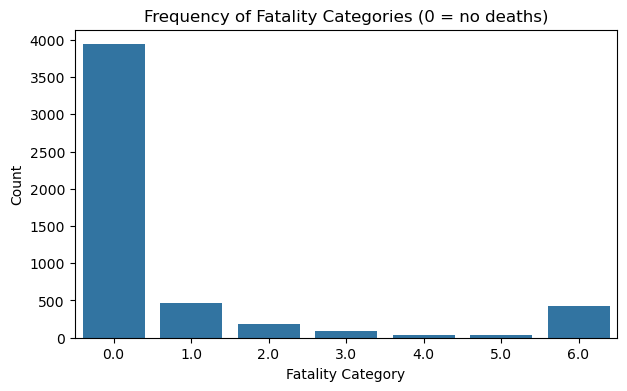

In [43]:
plt.figure(figsize=(7, 4))
sns.countplot(x="fatality_dispute", data=merged_clean)
plt.title("Frequency of Fatality Categories (0 = no deaths)")
plt.xlabel("Fatality Category")
plt.ylabel("Count")
plt.show()

#### Interpretation

Fatality categories are overwhelmingly concentrated at Category 0, meaning that the majority of militarized interstate disputes involve no direct battle deaths. This may seem surprising for a dataset covering major eras of war, but the pattern is fully consistent with the purpose of the MID dataset: it records sub-war militarized incidents, not full-scale wars. Higher fatality categories (3–6) appear only rarely, reflecting the fact that only a small number of disputes escalate beyond minor clashes or demonstrations of force.

### Joint Distribution: Hostility VS Duration
This visualization is important to use to eamine how dispute severity relates to dispute length. `hostlen_dispute` against `maxdur`

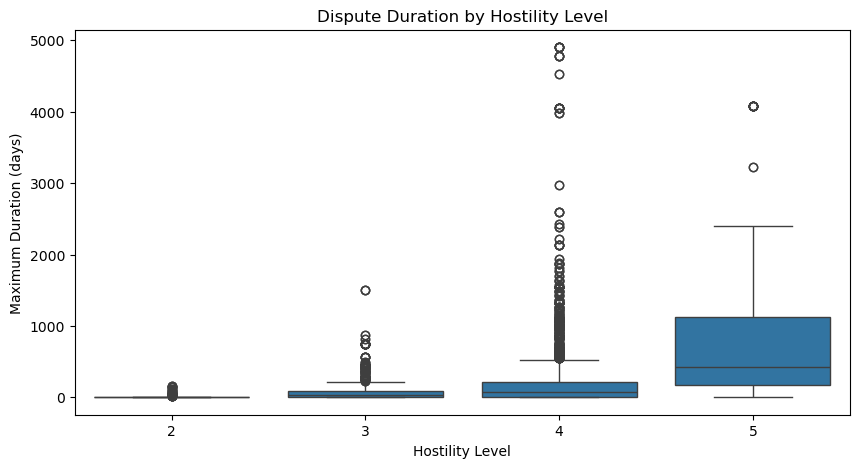

In [47]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="hostlev_dispute", y="maxdur", data=merged_clean)
plt.title("Dispute Duration by Hostility Level")
plt.xlabel("Hostility Level")
plt.ylabel("Maximum Duration (days)")
plt.show()

#### Interpretation

The boxplot of hostility levels versus dispute duration shows no strong linear relationship between the severity of a dispute and how long it lasts. Disputes at every hostility level-including the highest-are often short in duration, and even Level 5 disputes do not necessarily persist longer than moderate-intensity confrontations. This suggests that while hostility level reflects the type of military action taken, it is not a reliable predictor of how long a dispute will continue.

### Correlation Bar Chart
Visualize the correlations amongst key numeric variables and duration is extremely important for my exploration section. This helps identify relationships among duration, hostility, fatalities, and participation levels, it's very easy to read, and cleaner for mixed-type variables like my MID dataset

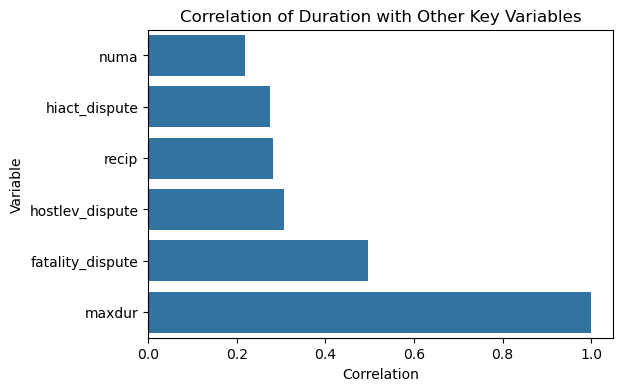

In [48]:
corr_with_duration = subset.corr()["maxdur"].sort_values()

plt.figure(figsize=(6, 4))
sns.barplot(x=corr_with_duration.values, y=corr_with_duration.index)
plt.title("Correlation of Duration with Other Key Variables")
plt.xlabel("Correlation")
plt.ylabel("Variable")
plt.show()

#### Interpretation

This barplot shows the correation between duration of a conflict and other key variables (ex. `fatality_dispute`, `maxdur`, etc). The correlations are generally small, indicating that no single indicator strongly predicts how long a dispute will last. Hostility level and highest action level have mild positive correlations with duration, meaning more intense disputes may last slightly longer on average, but the effect is weak. Fatality categories also show only a small correlation with duration. Reciprocity (`recip`) and state participation (`numa`) have almost no correlation with dispute length.

### Dispute Frequency Over Time
To explore historical patterns (one of the goals of my project), I will aggregate disputes by decade to visualize how the number of militarized incidents has evolved from 1816 to 2014.

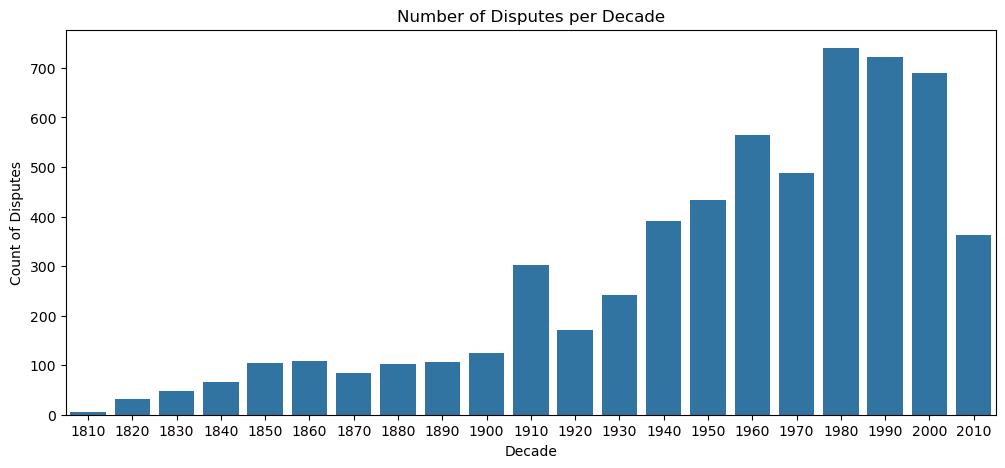

In [49]:
merged_clean["decade"] = (merged_clean["styear_dispute"] // 10) * 10

plt.figure(figsize=(12, 5))
sns.countplot(x="decade", data=merged_clean, order=sorted(merged_clean["decade"].unique()))
plt.title("Number of Disputes per Decade")
plt.xlabel("Decade")
plt.ylabel("Count of Disputes")
plt.xticks()
plt.show()

#### Interpretation

The number of militarized disputes increases dramatically over time, especially during the 20th century. Dispute frequency remains relatively low throughout the 1800s, reflecting the smaller number of independent states and the stability of the 19th-century international system. The sharp rise in the early and mid-20th century corresponds to periods of global upheaval, including both World Wars and the Cold War. The sustained high levels of disputes during the Cold War highlight the prevalence of proxy wars, border tensions, and military standoffs between rival states. After the 1990s, the
number of disputes begins to decline, reflecting post–Cold War de-escalation and increased global peace initiatives. Overall, the time trend suggests that militarized disputes are deeply shaped by broader geopolitical eras (i.e., nuclear arms race, political upheavals, etc).